# Carga de librerias

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as si
from pathlib import Path

path_datos = Path("./datos/")


# Cadenas de Markov

## Probabilidades de transición


<style>
mark{
    color:red;
}
</style>

Dada una cadena de Markov con espacio de estados $S$, definimos la *probabilidad de transición* del estado $i$ al estado $j$ como

$$
P(i,j):=P(X_{n+1}=j\vert X_n=i)
$$

La matriz $\mathbb{P}=[P(i,j)]$ cuya entrada $(i,j)$ coincide con la probabilidad de transición $P(i,j)$ se conoce como **matriz de transición**.

Adicionalmente definimos la distribución inicial de la cadena como:

$$
\pi_0(i) = P(X_0=i)\quad \text{ para } i\in \mathcal{S}
$$

Las probabilidades de transición así como la distribución inicial son de gran importancia, cualquier probabilidad conjunta puede expresarse en términos de ellas, por ejemplo:

$$
P(X_n=j,\ldots X_{1}=i_1, X_0=i) =\pi_0(i)P(i, i_1)P(i_1,i_2)\cdots P(i_{n-1},j) 
$$

Asimismo

$$
P(X_n=j,\ldots X_{1}=i_1\vert X_0=i) = P(i, i_1)P(i_1,i_2)\cdots P(i_{n-1},j) 
$$

La probabilidad de transición del estado $i$ al estado $j$ en $n$ pasos se define como sigue:

$$
P^{(n)}(i,j):=P(X_{n}=j\vert X_0=i)
$$

Por otro lado, podemos definir la matriz de transición en $n$ pasos: $\mathbb{P}^{(n)} = [P^{(n)}(i,j)]$.

De acuerdo con la ecuación de <span style="color:red;">**Chapman - Kolmogorov**</span>, la probabilidad transición del estado $i$ al estado $j$ en $n + m$ pasos se puede calcular a través de:

$$
P^{n+m} = \sum_{k \in \mathcal{S}} P^{n}(i,k)P^{m}(k,j)
$$

Lo cual en términos matriciales se escribe como:
$$
\mathbb{P}^{(n+m)} = \mathbb{P}^{(n)}\mathbb{P}^{(m)} 
$$

Esto tiene como consecuencia que:
$$
\mathbb{P}^{(n)} = \mathbb{P}^{n} 
$$

En general la distribución de la variable $X_n$ la denotamos con:
$$
\pi_n(i) = P(X_n=i)\quad \text{ para } i\in \mathcal{S}
$$
y podemos probar que:
$$
\pi_n(j) = \sum_{k\in \mathcal{S}}\pi_0(k)P^{(n)}(k,j)\quad \text{ para }j\in \mathcal{S}
$$
o bien de forma matricial
$$
\Pi_n=\Pi_0\cdot \mathbb{P}^{(n)}
$$
donde
$$
\Pi_0 = (\pi_0(i))_{i\in\mathbb{S}}
$$
y 
$$
\Pi_n = (\pi_n(i))_{i\in\mathbb{S}}
$$


## Carga de datos

In [2]:
#Carga de librerías
from numpy.linalg import matrix_power

matrices = path_datos / "matrices.xlsx"

# Cargamos matriz de transición en dataframe
P = pd.read_excel(matrices,
                  sheet_name='matrices',
                  usecols='C:E',
                  skiprows=7,
                  nrows=3,
                  header= None)


P = P.to_numpy()

# Cargamos distribución inicial
pi = pd.read_excel(matrices,
                  sheet_name='matrices',
                  usecols='C',
                  skiprows=2,
                  nrows=3,
                  header= None)

pi = pi.to_numpy()



In [20]:
pi

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

### Ejemplos:

Calcula:
1. $P(X_{5} =i)$ para $i \in \mathcal{S}$
2. $P(X_5 =2\vert X_1 = 1)$
3. $P(X_4=1, X_3=2\vert X_1=0,X_0=2)$

El primer punto lo resolvemos recordando que:
$$
\Pi_5 = \Pi\cdot \mathbb{P}^{(5)}
$$

El segundo inciso, se obtiene de observar que:

$$
P(X_5 =2\vert X_1 = 1)=P^{(4)}(1,2)
$$

Finalmente, el inciso 3 se resuleve al ver que:

$$
P(X_4=1, X_3=2\vert X_1=0,X_0=2)=P^{(2)}(0,2)P(2,1)
$$
Notemos que para llegar a esta conclusión usamos la propiedad de Markov al eliminar el evento $\{X_0=2\}$.

In [22]:
# Matrices de transicion en 1,3 y 4 pasos

P_2 = matrix_power(P,2) 
P_3 = matrix_power(P,3)
P_4 = matrix_power(P,4)
P_5 = matrix_power(P,5)

"""
-------------------------------------------
--- Distribución de X_1, X_2, X_3 y X_4 ---
--- P(X_n = i) para n=1,2,3,4           ---
-------------------------------------------
"""
pi_1 = pi.T @ P
pi_2 = pi.T @ P_2
pi_3 = pi.T @ P_3
pi_4 = pi.T @ P_4
pi_5 = pi.T @ P_4

In [23]:
pi_3

array([[0.25619695, 0.25619695, 0.4876061 ]])

## Caminata aleatoria

Sea $Z_1, Z_2,\ldots$ una colección de variables aleatorias independientes e idénticamente distribuidas y sea $X_0$ una variable aleatoria independiente de las variables $Z_i$, $i=1,2, \ldots$ con distribución $\pi$. El proceso estocástico, definido como:
$$
X_n = X_0 + Z_1 + \cdots + Z_n
$$ 
o bien:
$$
X_n = X_{n-1} + Z_n
$$ 

Es conocido como **caminata aleatoria**. En particular cuando 
$$
Z_i = 
    \begin{cases}
        \phantom{-}1 & \text{con probabilidad } \ \frac{1}{2} \\
        -1 & \text{con probabilidad } \ \frac{1}{2} 
    \end{cases}
$$

decimos que la caminata aleatoria es _simétrica_.

El código a continuación, simula una trayectoria de una caminata aleatoria simétrica con $n$ saltos:

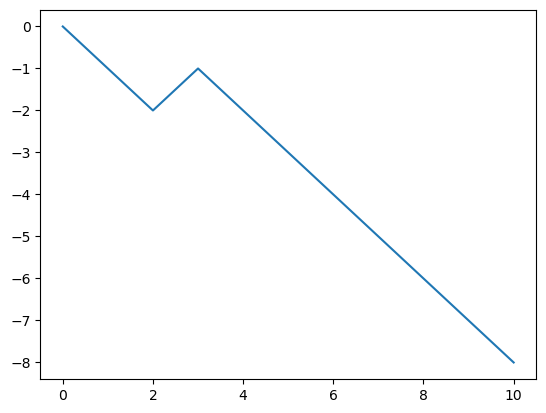

In [5]:
n = 10

X_0 = 0

Z = np.random.choice([1,-1],n)

X = np.cumsum(np.concatenate(([X_0], Z)))

plt.plot(X)
plt.show()

## Simulación Caminata Aleatoria Escalada

En una cadena aleatoria, observamos un solo salto por unidad de tiempo. En la versión escalada, introducimos $n$ saltos en cada unidad de tiempo. Cada salto es de tamaño $1/\sqrt{n}$, de modo que definimos la caminata aleatoria escalada como:

$$
W^{(n)}(t) = \frac{1}{\sqrt{n}}X_{nt}
$$

Por ejemplo, el proceso 
$$
W^{(100)}(t) = \frac{1}{10}X_{100\cdot t}
$$


Sería la caminata aleatria escalada con 100 saltos de tamaño $1/10$ por unidad de tiempo. 



El siguiente código, simula $k$ observaciones de una caminata aleatoria $W^{(n)}(t)$ al tiempo $t$, es decir una caminata aleatoria escalada con $nt$ saltos: 

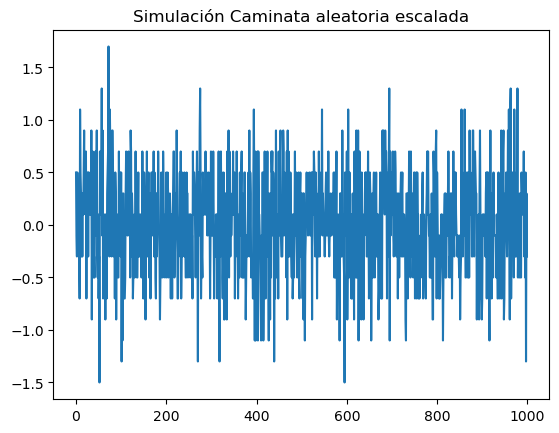

In [30]:
t = 0.25
k = 1000
n = 100

def random_w_n(t, n, k):
    for i in range(k):
        X = np.random.choice([1,-1],int(n*t))
        w_n = (1/np.sqrt(n))* np.sum(X)

        yield w_n

w_n = list(random_w_n(t,n,k))

plt.title("Simulación Caminata aleatoria escalada")
plt.plot(w_n)
plt.show()

En el caso de la caminata aleatoria simétrica escalda $W^{(100)}(t)$, supongamos por ejemplo que $t=0.25$, es decir $W^{(100)}(0.25) = \frac{1}{10}X_{25}$. Notemos que $X_{25}$ puede tomar cualquier valor impar entre -25 y 25, por lo cual, $W^{(100)}(0.25)$, puede tomar alguno de los valores, $-2.5, -2.3, \ldots, 2.3, 2.5$. 

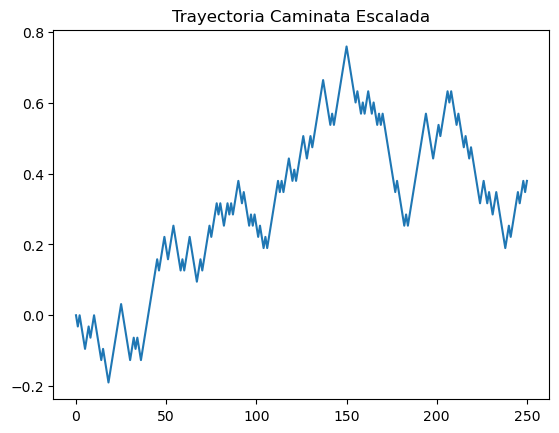

In [7]:
n = 1000
t = 0.25

X_0=0
X = np.random.choice([1,-1],int(n*t))

X = np.concatenate(([X_0], X)) 

W_n = 1/np.sqrt(n)*np.cumsum(X)


plt.title("Trayectoria Caminata Escalada")
plt.plot(W_n)
plt.show()

En la siguiente gráfica mostramos la simulación de múltiples trayectorias

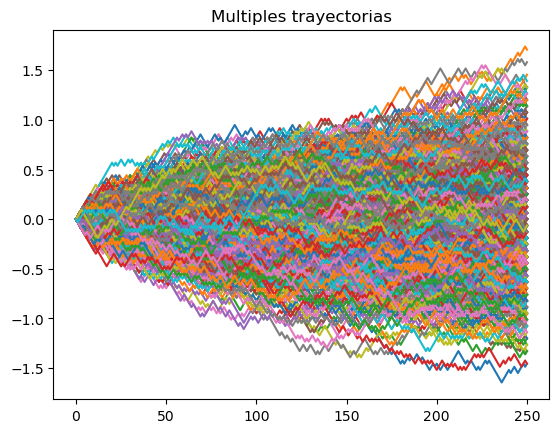

In [8]:
n = 1000
t = 0.25
k = 1000
s= 150
X_0 = 0

W_s=[]
for i in range(k):
    X = np.random.choice([1,-1],int(n*t))
    X = np.concatenate(([X_0], X))
    W_n = 1/np.sqrt(n)*np.cumsum(X)

    W_s.append(W_n[s])

    plt.plot(W_n)

plt.title("Multiples trayectorias")
plt.show()

Simulación de $n$ observaciones de la caminat aleatoria simétrica al tiempo $s$.

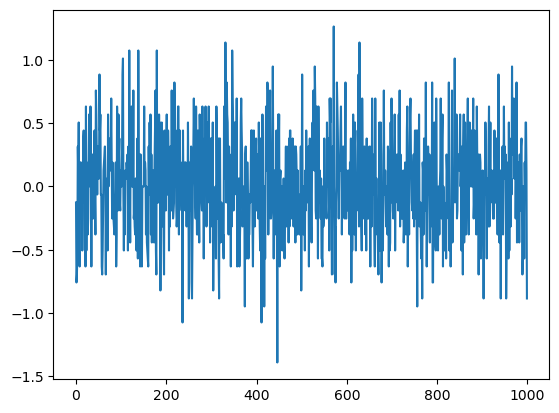

In [7]:
plt.plot(W_s)

In [10]:
path_datos.resolve()

PosixPath('/home/ger/GerDrive/Documentos/UNAM/procesos/notebooks/datos')

## Ejemplo práctico, precios de activos


In [11]:
#pip install yfinance

import yfinance as yf


posicion = pd.read_excel(path_datos / "posicion.xlsx", index_col="Ticker")


tickers = list(posicion.index)


tickers = yf.Tickers(tickers)

num_dias = 500
historia = tickers.history(period=f"{num_dias}d").Close 


[*********************100%***********************]  9 of 9 completed


In [13]:
import yfinance as yf


posicion = pd.read_excel("./datos/posicion.xlsx", index_col="Ticker")


tickers = list(posicion.index)


tickers = yf.Tickers(tickers)

num_dias = 500
historia = tickers.history(period=f"{num_dias}d").Close 




[*********************100%***********************]  9 of 9 completed


<AxesSubplot:xlabel='Date'>

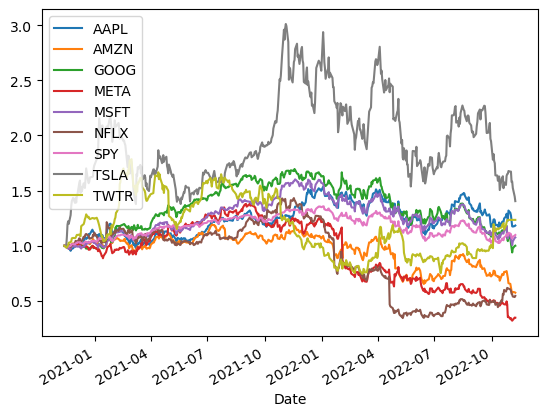

In [19]:

acumulado.plot()

### Obtenemos métricas adidionales:

In [15]:

rendimientos = historia.pct_change()

acumulado = (1+rendimientos.fillna(0)).cumprod()


correlaciones = rendimientos.corr()
covarianzas = rendimientos.cov()

vols = rendimientos.std().sort_values(ascending= False)

q = 0.975
escenario_var =np.round(500*(1-q))

var_param_individual = vols*si.norm.ppf(1-q)
var_hist_individual = pd.Series({i:rendimientos[[i]].nsmallest(13,i).iloc[-1][0] for i in rendimientos.columns})

volatilidad = np.sqrt(posicion.T.dot(covarianzas.dot(posicion))).iloc[0][0]
VaR_parametrico = volatilidad * si.norm.ppf(1-q)
VaR_historico = rendimientos.dot(posicion).sort_values('w').iloc[12][0]

vol_contrib = (covarianzas.dot(posicion)).mul(posicion)/volatilidad

var_contrib= vol_contrib*si.norm.ppf(1-q)



resultados = pd.Series({"q":q,
              "escenario_var":escenario_var,
              "Volatilidad":volatilidad,
              "VaR_parametrico": VaR_parametrico, 
              "VaR_historico" : VaR_historico}, name="Resultados")


individuales = pd.DataFrame({"Parametrico":var_param_individual, 
                             "Historico":var_hist_individual,
                             "Vols":vols,
                             "vol_contrib":vol_contrib.w,
                             "var_contrib":var_contrib.w})


with pd.ExcelWriter(path_datos / "Resultados.xlsx") as w:
    resultados.to_excel(w,sheet_name="Resultados")
    individuales.to_excel(w,sheet_name="Individuales")
    covarianzas.to_excel(w,sheet_name="Covarianzas")
    correlaciones.to_excel(w,sheet_name="Correlaciones")



#diag_vols = pd.DataFrame(np.diag(vols), index = vols.index, columns= vols.index)

 

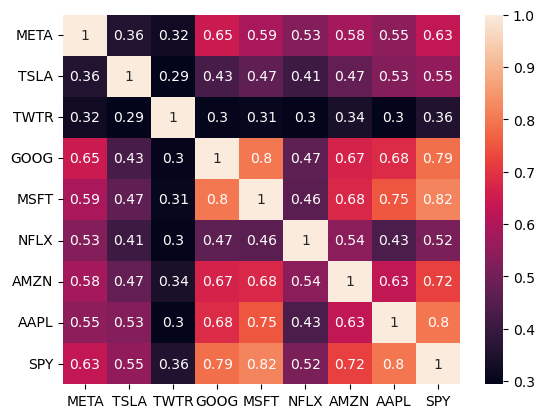

In [20]:
import seaborn as sns
ax = sns.heatmap(correlaciones.loc[tickers.symbols, tickers.symbols], annot=True)

# Movimiento Browniano

## Simulación Movimiento Browniano Estándar

Un proceso estocástico $W(t)$ definido en un espacio de probabilidad $(\Omega,\mathcal{F},P)$, es un **Movimiento Browniano Estándar** si es de trayectorias continuas casi seguramente y

1. $W(0) = 0$.
2. Es de incrementos independientes.
3. $W(t)-W(s)$ se distribuye normal con media cero y varianza $t-s$.

Simulamos a continuación $k$ observaciones de un movimiento browniano estándar al tiempo $t$: 

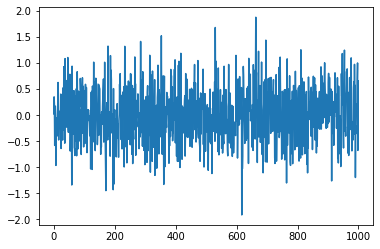

In [ ]:
t = 0.25
k = 1000

sigma =  np.sqrt(t)
w = np.random.normal(0, sigma, k)

plt.plot(w)
plt.show()

De las gráfica anteriores podemos verificar el gran parecido que muestran el Movimiento Browniano Estándar y una caminata aleatoria, simétrica. En el código podemos jugar un poco con el número de saltos presentes en la caminata aleatoria, sabemos que la convergencia en distribución la  obtenemos a medida que el número de saltos tiende a infinito.



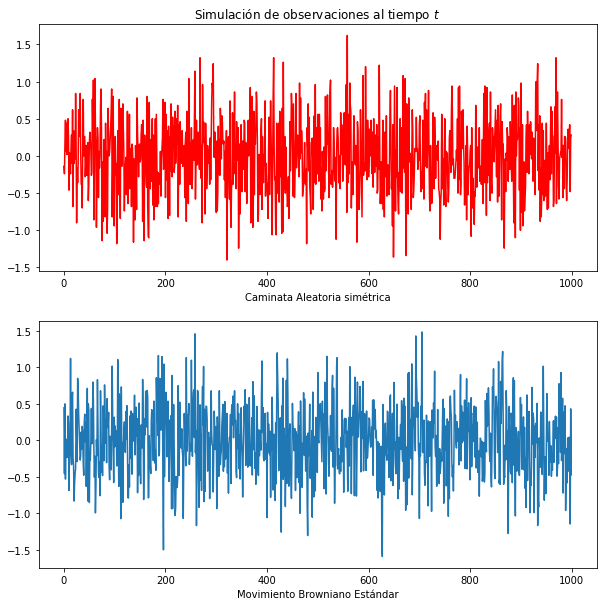

In [ ]:
# Create some fake data.

t = 0.25
k = 1000
n = 10000

def random_w_n(t, n, k):
    for i in range(k):
        X = np.random.choice([1,-1],int(n*t))
        w_n = (1/np.sqrt(n))* np.sum(X)

        yield w_n


""" --- Caminata aleatoria --- """
w_n = list(random_w_n(t,n,k))

""" --- Movimiento Browniano --- """
sigma =  np.sqrt(t)
w = np.random.normal(0, sigma, k)

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(w_n, color='red')
plt.title('Simulación de observaciones al tiempo $t$')
plt.xlabel('Caminata Aleatoria simétrica')

plt.subplot(2, 1, 2)
plt.plot(w)
plt.xlabel('Movimiento Browniano Estándar')


plt.show()

La gráfica a continuación, compara ambos procesos evaluados en un tiempo común $t$. 

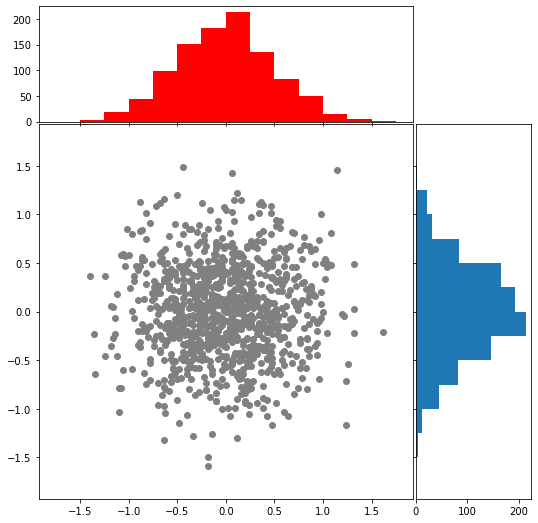

In [ ]:
# Fixing random state for reproducibility
#np.random.seed(19680801)

# Caminata Aleatoria vs Movimiento Browniano
x = w_n
y = w


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, color = 'gray')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,color='red')
    ax_histy.hist(y, bins=bins, orientation='horizontal')

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

## Simulación de trayectorias

En los ejemplos anteriores, lo su hicimos fue simular $k$ observaciones de una caminata aleatoria y de un Movimiento Browniano, respectivamente. Sin embargo esto lo hicimo sólo en un momento específico $t$.

Sin embargo un proceso estocástico, dado un $\omega\in \Omega$ define una función que depende del tiempo. Esta función es conocida como _trayectoria del proceso_. En este sentido podemos simular toda una serie de trayectorias para cada proceso.

### Trayectorias de la caminata aleatoria simétrica escalada:

En realidad este problema no es fundamentalmente diferente del que expusimos en el primer, ejemplo. La diferencia fundamental la encontramos en el hecho de que por cada unidad de tiempo introduciremos $n$ saltos:

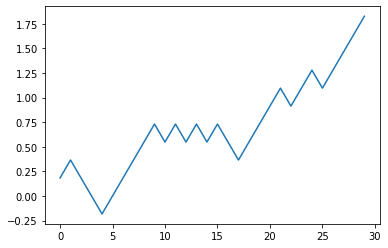

In [ ]:
n =  30
t = 1


smpl = np.random.choice([1,-1],int(n*t))

w_n = 1/np.sqrt(n)*np.cumsum(smpl)

plt.plot(w_n)
plt.show()

### Trayectorias Movimiento Browniano Estándar.

Un proceso estocástico, no es mas que un modelo que pretende capturar el comportamiento dinámico de cierto fenómeno. En este sentido y dependiendo del problema que deseemos atacar, en algunos casos la simulación de una trayectoria completa puede ser de gran importancia. El Movimineto Browniano no es la excepción.

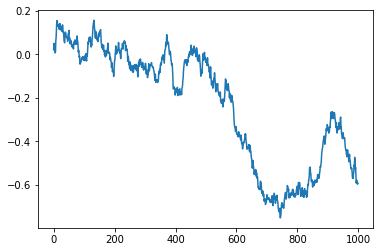

In [ ]:
n = 1000
t = 0.25

dt = t/n

#Simulamos incrementos del Movimiento Browniano:
smpl = np.random.normal(0,np.sqrt(dt), n)  

w = np.cumsum(smpl)

plt.plot(w)
plt.show()


observemos que en la simulación anterior, simulamos una serie de incrementos del movimiento browniano:
$$
W(t_{i+1})-W(t_i)
$$
donde estos incrementos son igualmente espaciados. Es decir:

$$
t_{i+1}-t_i = dt = \frac{t}{n}
$$
para toda $i$.

De modo que para una partición $0 = t_0, t_1,\ldots, t_{n-1},t_n = t$:

$$
W(t) = \sum_{i=1}^n W(t_i)-W(t_{i-1})
$$

dedo que todos los incrementos que usamos son igualmente espaciados, entonces:
$$
W(t_{i+1})-W(t_i) \sim N(0, dt)
$$

para todo $i$.



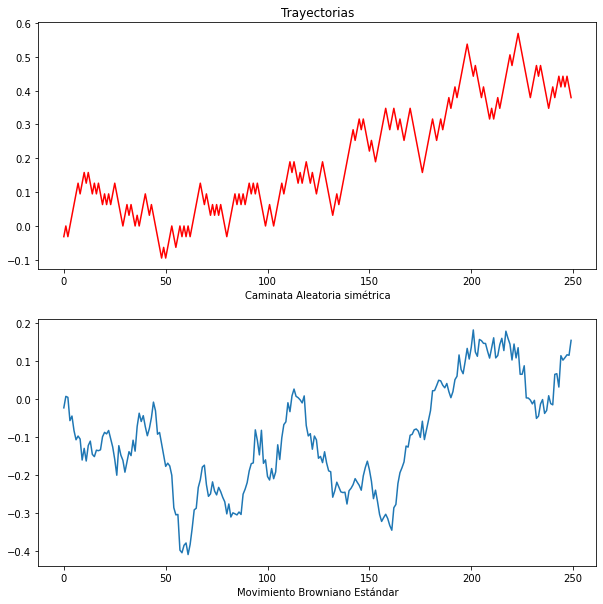

In [ ]:
t = 0.25
n = 1000


""" --- Caminata aleatoria --- """
smpl = np.random.choice([1,-1],int(n*t))
w_n = 1/np.sqrt(n)*np.cumsum(smpl)


""" --- Movimiento Browniano --- """
smpl = np.random.normal(0,np.sqrt(1/n), int(n*t))  
w = np.cumsum(smpl)



plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(w_n, color='red')
plt.title('Trayectorias')
plt.xlabel('Caminata Aleatoria simétrica')

plt.subplot(2, 1, 2)
plt.plot(w)
plt.xlabel('Movimiento Browniano Estándar')


plt.show()

# Valuacion de Opciones

## Simulacion

## Fórmula de Black & Scholes

In [ ]:
import numpy as np
import scipy.stats as si
from matplotlib import pyplot as plt

def europea_vainila_bs(S, K, T, r, sigma, es_call = True):
    """
    Calcula el precio de una opcion europea vainilla
    
    Parametros:

    float S: Precio Spot
    float K: Strike Price
    float T: Time to Maturity
    float sigma: Volatilidad del subyacente
    bool es_call: Es call? Es Put?

    """
    
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if es_call:
        precio = (S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2))
    else:
        precio = (K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1))
        
    return precio

## Monte Carlo

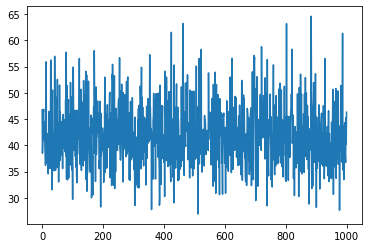

In [ ]:
S = 40
K = 42
T = 0.5
r = 0.1
sigma= 0.2
n= 1000

w_T = np.random.normal(0, np.sqrt(T), n)
S_T = S*np.exp((r-0.5*sigma**2)*T+sigma*w_T)

plt.plot(S_T)
plt.show()


In [ ]:
def europea_vainila_mc(S, K, T, r, sigma, es_call = True, n = 100):
    """
    Calcula el precio de una opcion europea vainilla
    usando método Montecarlo.
    
    Parametros:

    float S: Precio Spot
    float K: Strike Price
    float T: Time to Maturity
    float sigma: Volatilidad del subyacente
    bool es_call: Es call? Es Put?
    int n: Cantidad des pseudo aleatorios simulados

    """
    
    w_T = np.random.normal(0, np.sqrt(T), n)
    S_T = S*np.exp((r-0.5*sigma**2)*T+ sigma*w_T)

    if es_call:
        pay_off = np.maximum(S_T-K,0)
    else:
        pay_off = np.maximum(K-S_T,0)

    precio =np.exp(-r*T)*np.average(pay_off)
        
    return precio

## Precios.

In [ ]:
S = 40
K = 42
T = 0.5
r = 0.1
sigma= 0.2
n = 10000

bs = europea_vainila_bs(S,K,T,r,sigma)
mc = europea_vainila_mc(S,K,T,r,sigma, n)

print(f"Black & Scholes: {bs}")
print(f"Montecarlo: {mc}")


Black & Scholes: 2.2777803294555348
Montecarlo: 2.15595468740881
